In [1]:
import sklearn as sk
import sklearn.tree as tree
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
import pickle
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('data2.csv')
df

,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list,subjectivity,polarity
0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69,"['dance_pop', 'hip_hop', 'hip_pop', 'pop', 'po...",low,Neutral
1,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,Toxic,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,84,dance_pop pop post-teen_pop,83,"['dance_pop', 'pop', 'post-teen_pop']",low,Neutral
2,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,86,dance_pop pop r&b,25,"['dance_pop', 'pop', 'r&b']",high,Negative
3,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,0.892,0.714,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,82,dance_pop pop,79,"['dance_pop', 'pop']",low,Neutral
4,Shaggy,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,75,pop_rap reggae_fusion,2,"['pop_rap', 'reggae_fusion']",low,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34242,Jon D,3uCHI1gfOUL5j5swEh0TcH,I Don't Know,0.669,0.228,2,-12.119,1,0.0690,0.79200,0.065000,0.0944,0.402,83.024,47,unknown,27,['unknown'],low,Neutral
34243,Big Words,0P1oO2gREMYUCoOkzYAyFu,The Answer,0.493,0.727,1,-5.031,1,0.2170,0.08730,0.000000,0.1290,0.289,73.259,39,australian_r&b,37,['australian_r&b'],low,Neutral
34244,Allan Rayman,2oM4BuruDnEvk59IvIXCwn,25.22,0.702,0.524,7,-10.710,1,0.0793,0.33200,0.055300,0.2980,0.265,140.089,55,canadian_contemporary_r&b modern_alternative_rock,49,"['canadian_contemporary_r&b', 'modern_alternat...",low,Neutral
34245,Jon Jason,4Ri5TTUgjM96tbQZd5Ua7V,Good Feeling,0.509,0.286,8,-14.722,1,0.1230,0.40200,0.000012,0.1310,0.259,121.633,4,unknown,16,['unknown'],high,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34247 entries, 0 to 34246
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       34247 non-null  object 
 1   id                34247 non-null  object 
 2   track_name        34247 non-null  object 
 3   danceability      34247 non-null  float64
 4   energy            34247 non-null  float64
 5   key               34247 non-null  int64  
 6   loudness          34247 non-null  float64
 7   mode              34247 non-null  int64  
 8   speechiness       34247 non-null  float64
 9   acousticness      34247 non-null  float64
 10  instrumentalness  34247 non-null  float64
 11  liveness          34247 non-null  float64
 12  valence           34247 non-null  float64
 13  tempo             34247 non-null  float64
 14  artist_pop        34247 non-null  int64  
 15  genres            34247 non-null  object 
 16  track_pop         34247 non-null  int64 

In [5]:
df.shape

(34247, 20)

In [6]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,track_pop
count,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000
mean,0.584693,0.636613,5.214209,-7.606617,0.665080,0.091165,0.263740,0.077185,0.197244,0.486016,121.703229,61.916606,31.114959
std,0.164307,0.225477,3.583579,3.967167,0.471969,0.101096,0.300548,0.218725,0.166794,0.243630,29.296913,19.120147,25.468451
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476000,0.490000,2.000000,-9.165500,0.000000,0.035100,0.020100,0.000000,0.095800,0.292000,98.623000,51.000000,0.000000
50%,0.592000,0.669000,5.000000,-6.695000,1.000000,0.048900,0.126000,0.000008,0.128000,0.477000,120.930000,65.000000,34.000000
75%,0.705000,0.818000,8.000000,-5.002000,1.000000,0.095800,0.445000,0.002700,0.252000,0.677000,140.032000,76.000000,53.000000
max,0.988000,1.000000,11.000000,2.766000,1.000000,0.962000,0.996000,0.995000,1.000000,0.998000,219.297000,100.000000,97.000000


In [7]:
count = df.nunique()
count = count.sort_values()
count

mode                    2
polarity                3
subjectivity            3
key                    12
track_pop              95
artist_pop             99
danceability          924
speechiness          1346
energy               1357
valence              1487
liveness             1643
acousticness         3933
instrumentalness     4881
genres               5991
genres_list          5991
artist_name          9722
loudness            12156
tempo               24362
track_name          30046
id                  34247
dtype: int64

In [8]:
df.drop(['id', 'artist_name','track_name','artist_pop','genres_list'],axis=1,inplace=True)

In [9]:
count = df.nunique()
count = count.sort_values()
count

mode                    2
subjectivity            3
polarity                3
key                    12
track_pop              95
danceability          924
speechiness          1346
energy               1357
valence              1487
liveness             1643
acousticness         3933
instrumentalness     4881
genres               5991
loudness            12156
tempo               24362
dtype: int64

In [10]:
df.skew()

danceability       -0.283729
energy             -0.584381
key                 0.021665
loudness           -1.956228
mode               -0.699578
speechiness         2.881593
acousticness        1.045306
instrumentalness    2.981368
liveness            2.201000
valence             0.126693
tempo               0.311184
track_pop           0.062450
dtype: float64

In [11]:
columns = ['speechiness', 'acousticness', 'instrumentalness', 'liveness']
for col in columns:
    df[col] = np.sqrt(df[col])

In [12]:
df.skew()

danceability       -0.283729
energy             -0.584381
key                 0.021665
loudness           -1.956228
mode               -0.699578
speechiness         1.750408
acousticness        0.412073
instrumentalness    2.409801
liveness            1.327290
valence             0.126693
tempo               0.311184
track_pop           0.062450
dtype: float64

In [13]:
columns = ['speechiness', 'instrumentalness', 'liveness']
for col in columns:
    df[col] = np.sqrt(df[col])

In [14]:
df.skew()

danceability       -0.283729
energy             -0.584381
key                 0.021665
loudness           -1.956228
mode               -0.699578
speechiness         1.290984
acousticness        0.412073
instrumentalness    1.716450
liveness            0.880255
valence             0.126693
tempo               0.311184
track_pop           0.062450
dtype: float64

In [15]:
columns = ['speechiness', 'instrumentalness']
for col in columns:
    df[col] = np.sqrt(df[col])

In [16]:
df.skew()

danceability       -0.283729
energy             -0.584381
key                 0.021665
loudness           -1.956228
mode               -0.699578
speechiness         0.594164
acousticness        0.412073
instrumentalness    0.836126
liveness            0.880255
valence             0.126693
tempo               0.311184
track_pop           0.062450
dtype: float64

In [17]:

genre = (df["genres"].str.strip()).str.lower()


In [18]:
def genre_splitter(genre):
    result = genre.copy()
    result = result.str.split(" ",1)
    for i in range(len(result)):
        if (len(result[i]) > 1):
            result[i] = [result[i][1]]
    return result.str.join('')

In [19]:
genre_m1 = genre.copy()
while(max((genre_m1.str.split(" ", 1)).str.len()) > 1):
    genre_m1 = genre_splitter(genre_m1)

In [20]:
len(genre_m1.unique())

1329

In [21]:
genre_m1.value_counts()

unknown                       2047
rock                          2015
trap                          1515
urban_contemporary            1491
stomp_and_holler               961
                              ... 
vintage_french_psychedelic       1
indie_shoegaze                   1
sitar                            1
traditional_soul                 1
musica_potosina                  1
Name: genres, Length: 1329, dtype: int64

In [22]:
df['genres'] = genre_m1


In [23]:
df.set_index(["genres"],drop = False, inplace = True)
df.drop(index = "unknown", inplace = True)

In [24]:
main_genres = ['rock','pop','blues','hip_hop','jazz','reggae','techno','trap','regga','rap','r&b']
def check_genre(sir):
    for word in main_genres:
        if sir.find(word) != -1:
            if word == 'rap':
                return 'hip_hop'
            else:
                return word
    return sir

df['genres'] = df['genres'].apply(check_genre)
genre = (df["genres"].str.strip()).str.lower()

In [25]:
genre_m1 = genre.copy()
genre_m1
genre_m1.value_counts()

pop                   5965
rock                  5574
hip_hop               2686
trap                  2334
urban_contemporary    1491
                      ... 
latin_christian          1
torch_song               1
tin_pan_alley            1
big_band                 1
musica_potosina          1
Name: genres, Length: 829, dtype: int64

In [26]:
unique = genre_m1.unique()


In [27]:
unique = genre_m1.unique()
to_remove = [] 

# genres that have a single instance only will be placed within the to_remove array
for genre in unique:
    if genre_m1.value_counts()[genre] < 200: # 10 was arbitrarily chosen
        to_remove += [genre]
len(to_remove)

811

In [28]:
df.set_index(["genres"],drop = False, inplace = True)
for name in to_remove:
    type(name)
    df.drop(index = str(name), inplace = True)


In [29]:
genre = (df["genres"].str.strip()).str.lower()


In [30]:
genre_m1 = genre.copy()
genre_m1
genre_m1.value_counts()

pop                   5965
rock                  5574
hip_hop               2686
trap                  2334
urban_contemporary    1491
stomp_and_holler       961
tropical_house         643
worship                614
country_road           497
reggae                 398
jazz                   380
r&b                    343
singer-songwriter      301
show_tunes             290
soul                   282
texas_country          276
screamo                254
vapor_soul             252
Name: genres, dtype: int64

In [31]:
main_genres = ['rock','pop','blues','hip_hop','jazz','reggae','techno','trap','regga','rap','r&b']
def check_genre(sir):
    for word in main_genres:
        if sir.find(word) != -1:
            if word == 'rap':
                return 'hip hop'
            else:
                return word
    return sir

df['genres'] = df['genres'].apply(check_genre)
genre = (df["genres"].str.strip()).str.lower()


In [32]:
genre_m1 = genre.copy()
genre_m1
genre_m1.value_counts()

pop                   5965
rock                  5574
hip_hop               2686
trap                  2334
urban_contemporary    1491
stomp_and_holler       961
tropical_house         643
worship                614
country_road           497
reggae                 398
jazz                   380
r&b                    343
singer-songwriter      301
show_tunes             290
soul                   282
texas_country          276
screamo                254
vapor_soul             252
Name: genres, dtype: int64

In [33]:
df


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genres,track_pop,subjectivity,polarity
genres,,,,,,,,,,,,,,,
hip_hop,0.904,0.813,4,-7.105,0,0.767977,0.176352,0.537532,0.465860,0.810,125.461,hip_hop,69,low,Neutral
pop,0.774,0.838,5,-3.914,0,0.762278,0.157797,0.630583,0.701381,0.924,143.040,pop,83,low,Neutral
r&b,0.664,0.758,2,-6.583,0,0.822768,0.048785,0.000000,0.494510,0.701,99.259,r&b,25,high,Negative
pop,0.892,0.714,4,-6.055,0,0.782803,0.448330,0.351683,0.477760,0.817,100.972,pop,79,low,Neutral
reggae,0.853,0.606,0,-4.596,1,0.718847,0.236854,0.000000,0.747973,0.654,94.759,reggae,2,low,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pop,0.458,0.650,5,-6.581,1,0.653590,0.417133,0.000000,0.542318,0.341,77.953,pop,20,high,Neutral
vapor_soul,0.416,0.394,11,-9.269,1,0.709345,0.716240,0.445442,0.560647,0.131,81.988,vapor_soul,0,low,Neutral
r&b,0.493,0.727,1,-5.031,1,0.826147,0.295466,0.000000,0.599304,0.289,73.259,r&b,37,low,Neutral


In [34]:
print(sns)

<module 'seaborn' from '/home/hiracansu1/.local/lib/python3.8/site-packages/seaborn/__init__.py'>


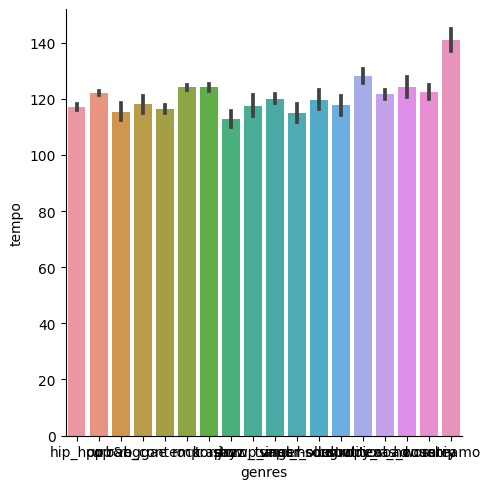

In [35]:
sns.catplot(data=df,x = 'genres', y='tempo', kind="bar")

In [36]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

<AxesSubplot: xlabel='tempo', ylabel='Density'>

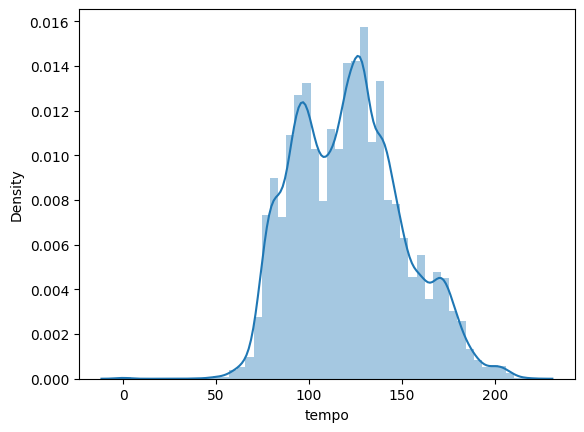

In [37]:
sns.distplot(df['tempo'])

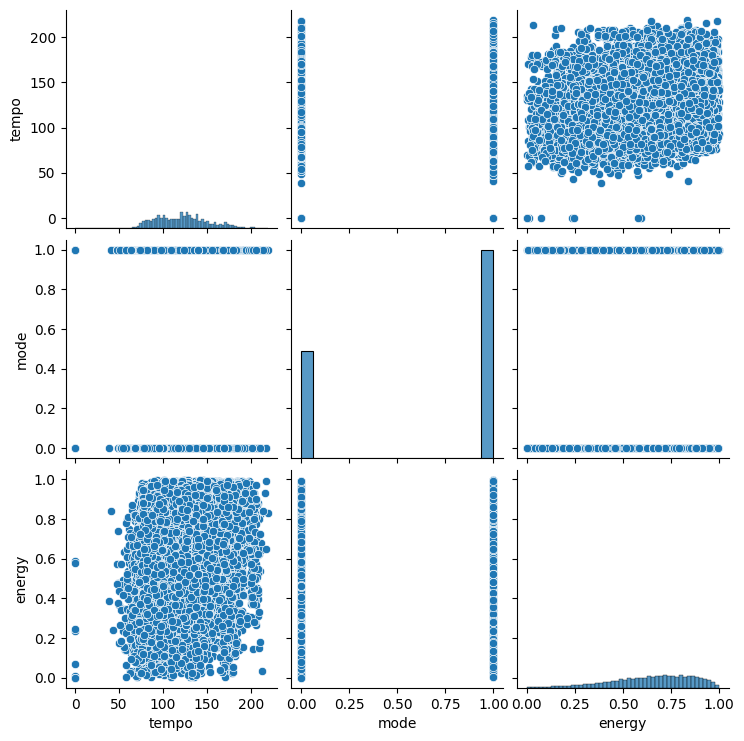

In [38]:
sns.pairplot(df[['tempo' ,'mode', 'energy']])

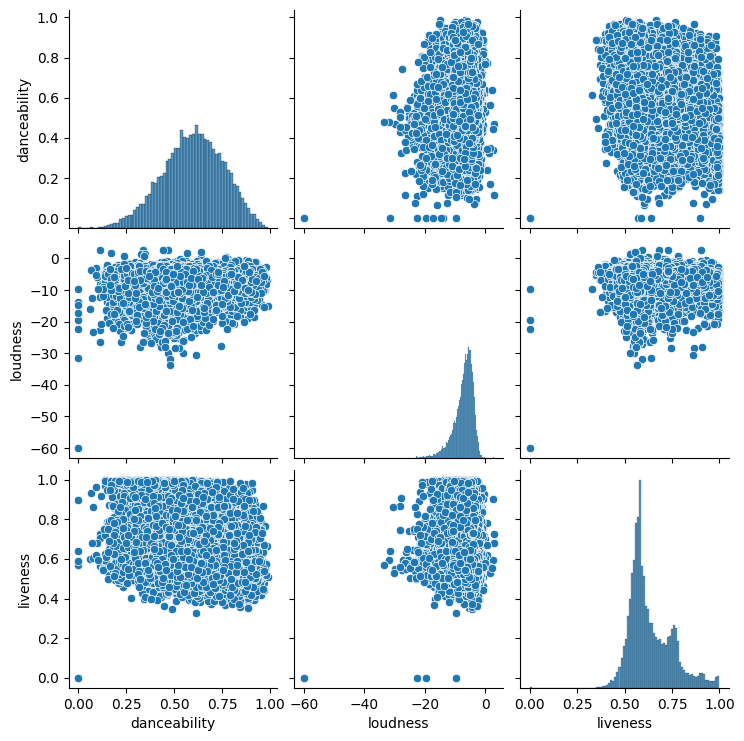

In [39]:
sns.pairplot(df[['danceability' ,'loudness', 'liveness']])

<AxesSubplot: >

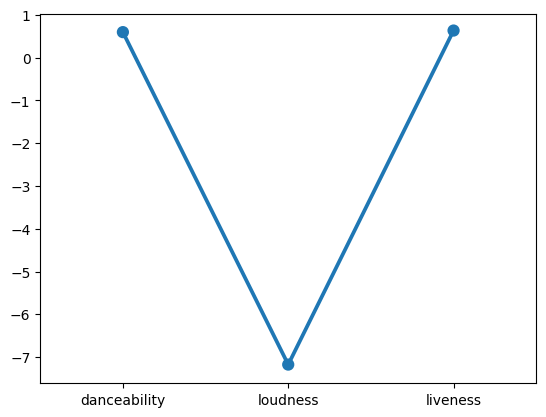

In [40]:
sns.pointplot(df[['danceability' ,'loudness', 'liveness']])

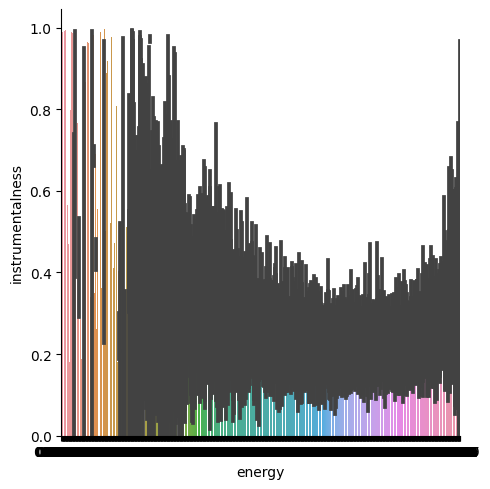

In [41]:
sns.catplot(data=df,x = 'energy', y='instrumentalness', kind="bar")

In [42]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genres,track_pop,subjectivity,polarity
genres,,,,,,,,,,,,,,,
hip_hop,0.904,0.813,4,-7.105,0,0.767977,0.176352,0.537532,0.465860,0.810,125.461,hip_hop,69,low,Neutral
pop,0.774,0.838,5,-3.914,0,0.762278,0.157797,0.630583,0.701381,0.924,143.040,pop,83,low,Neutral
r&b,0.664,0.758,2,-6.583,0,0.822768,0.048785,0.000000,0.494510,0.701,99.259,r&b,25,high,Negative
pop,0.892,0.714,4,-6.055,0,0.782803,0.448330,0.351683,0.477760,0.817,100.972,pop,79,low,Neutral
reggae,0.853,0.606,0,-4.596,1,0.718847,0.236854,0.000000,0.747973,0.654,94.759,reggae,2,low,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pop,0.458,0.650,5,-6.581,1,0.653590,0.417133,0.000000,0.542318,0.341,77.953,pop,20,high,Neutral
vapor_soul,0.416,0.394,11,-9.269,1,0.709345,0.716240,0.445442,0.560647,0.131,81.988,vapor_soul,0,low,Neutral
r&b,0.493,0.727,1,-5.031,1,0.826147,0.295466,0.000000,0.599304,0.289,73.259,r&b,37,low,Neutral


In [43]:
genre_m1.value_counts()

pop                   5965
rock                  5574
hip_hop               2686
trap                  2334
urban_contemporary    1491
stomp_and_holler       961
tropical_house         643
worship                614
country_road           497
reggae                 398
jazz                   380
r&b                    343
singer-songwriter      301
show_tunes             290
soul                   282
texas_country          276
screamo                254
vapor_soul             252
Name: genres, dtype: int64

In [44]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])

In [45]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['genres', 'subjectivity', 'polarity'], dtype='object')

In [46]:
for col in cat_df.columns:
    transform(col)

df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genres,track_pop,subjectivity,polarity
genres,,,,,,,,,,,,,,,
hip_hop,0.904,0.813,4,-7.105,0,0.767977,0.176352,0.537532,0.465860,0.810,125.461,1,69,1,1
pop,0.774,0.838,5,-3.914,0,0.762278,0.157797,0.630583,0.701381,0.924,143.040,3,83,1,1
r&b,0.664,0.758,2,-6.583,0,0.822768,0.048785,0.000000,0.494510,0.701,99.259,4,25,0,0
pop,0.892,0.714,4,-6.055,0,0.782803,0.448330,0.351683,0.477760,0.817,100.972,3,79,1,1
reggae,0.853,0.606,0,-4.596,1,0.718847,0.236854,0.000000,0.747973,0.654,94.759,5,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pop,0.458,0.650,5,-6.581,1,0.653590,0.417133,0.000000,0.542318,0.341,77.953,3,20,0,1
vapor_soul,0.416,0.394,11,-9.269,1,0.709345,0.716240,0.445442,0.560647,0.131,81.988,16,0,1,1
r&b,0.493,0.727,1,-5.031,1,0.826147,0.295466,0.000000,0.599304,0.289,73.259,4,37,1,1


In [47]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [48]:
df.dtypes


danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genres                int64
track_pop             int64
subjectivity          int64
polarity              int64
dtype: object

In [49]:
X = df.drop('genres',axis=1)
Y = df.genres

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.15)

In [51]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(X_train)

# Standard Scaler
X_train_ST = standard_scaler.transform(X_train)
X_test_ST = standard_scaler.transform(X_test)

In [52]:
unique = np.unique(y_train)


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rand_forest = RandomForestClassifier(random_state = 42, min_samples_split = 5)
clf = LogisticRegression(multi_class = 'ovr')

In [54]:
df.dtypes


danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genres                int64
track_pop             int64
subjectivity          int64
polarity              int64
dtype: object

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [56]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
result_ST =[]
kfold = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
RF_cross_val_score = cross_val_score(rand_forest, X_train_ST, y_train, cv = kfold, scoring = 'accuracy')
print('%s: %f (%f)' % ('Random Forest', RF_cross_val_score.mean(), RF_cross_val_score.std()))

Random Forest: 0.411948 (0.004841)


In [57]:
kfold = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
RF_cross_val_score = cross_val_score(clf, X_train_ST, y_train, cv = kfold, scoring = 'accuracy')
print('%s: %f (%f)' % ('Random Forest', RF_cross_val_score.mean(), RF_cross_val_score.std()))

Random Forest: 0.388135 (0.006935)


<AxesSubplot: >

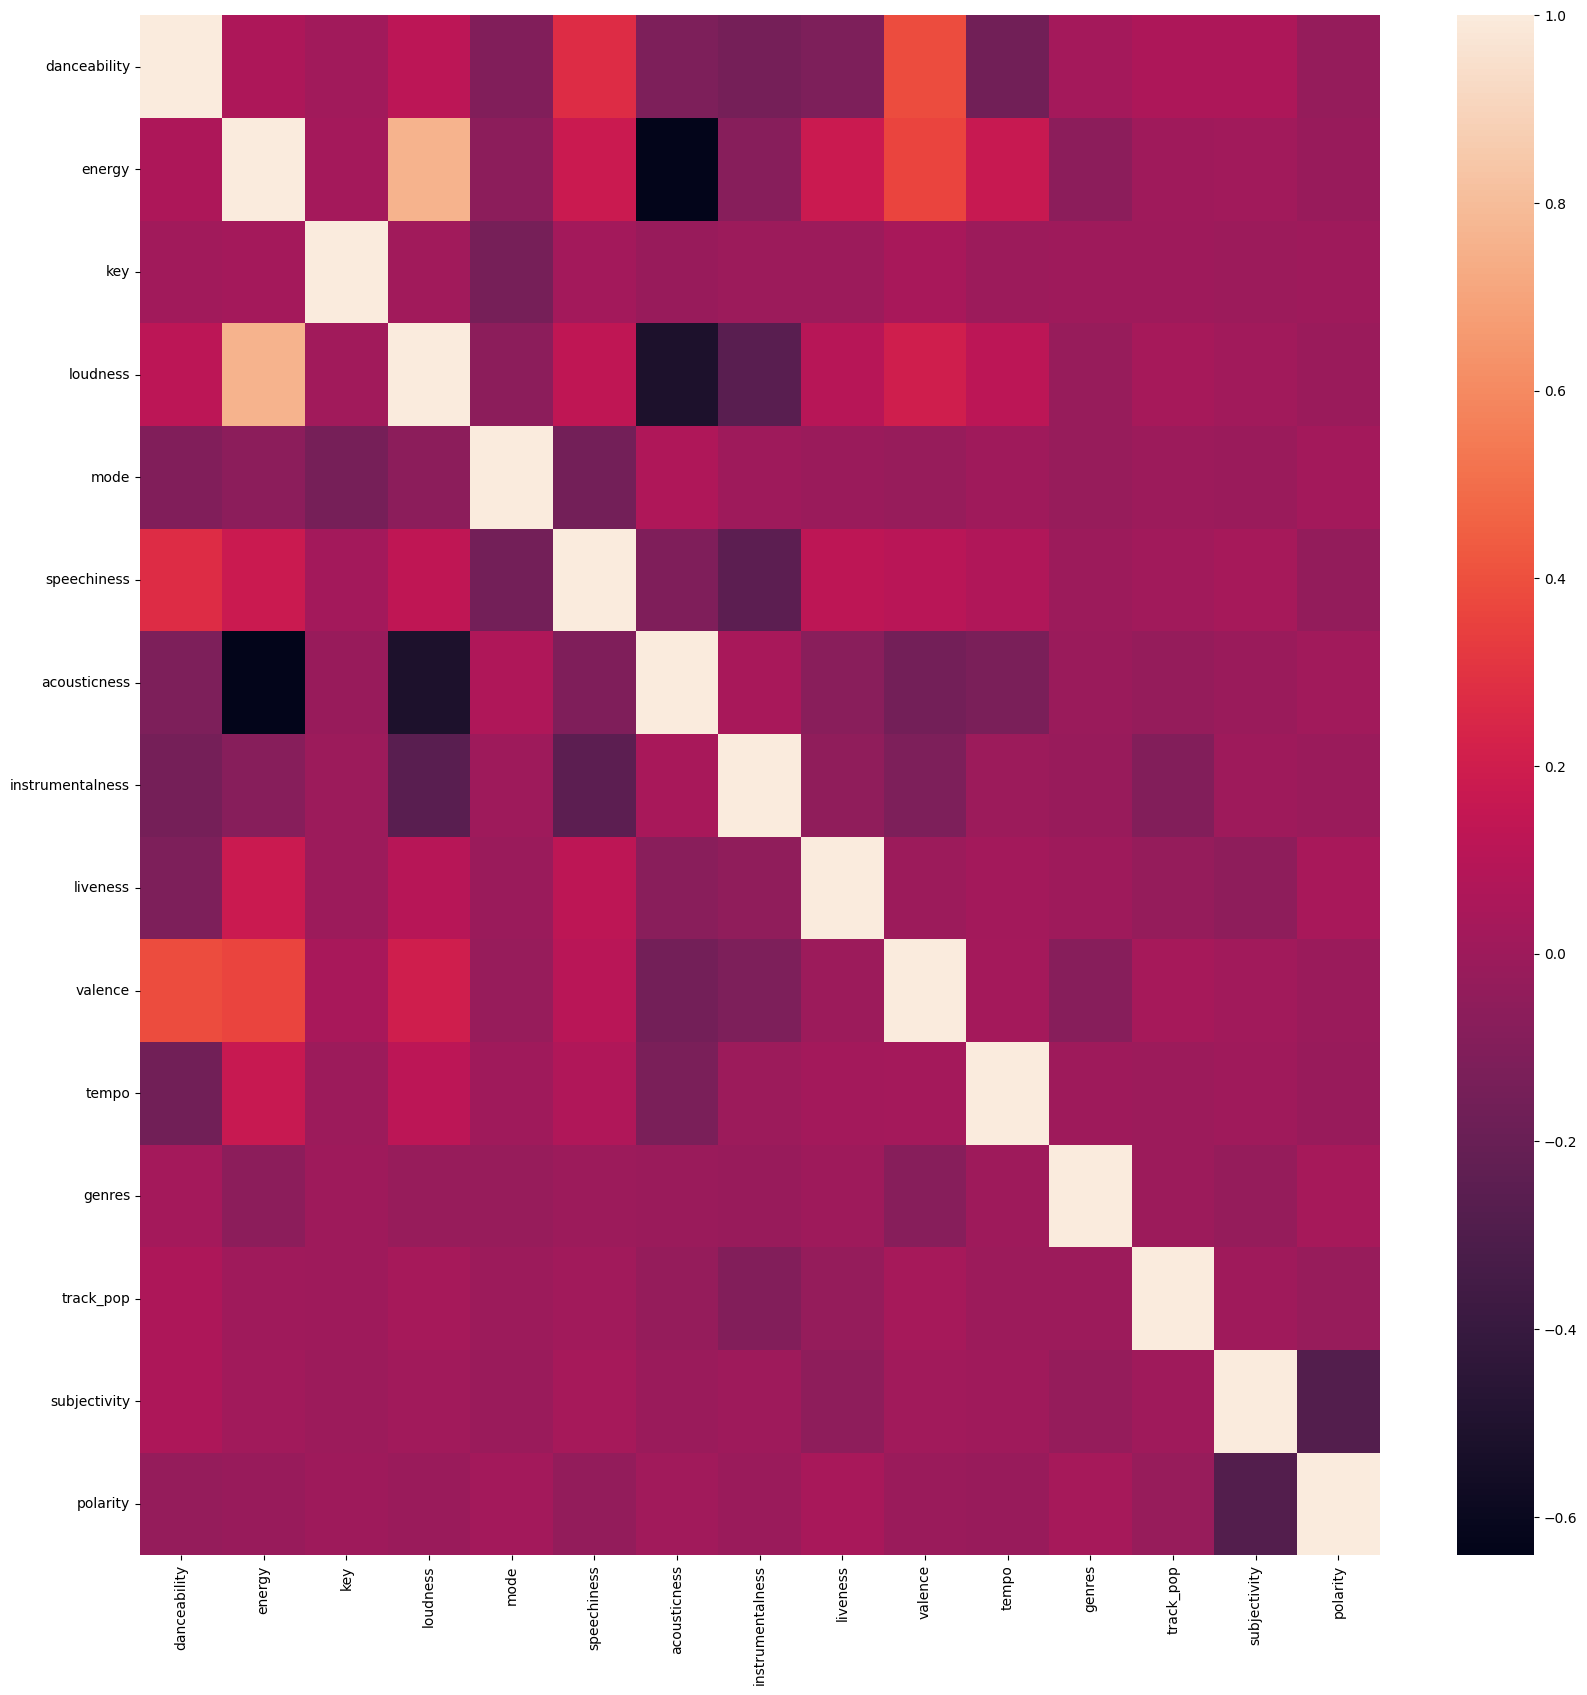

In [58]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot=False)

In [59]:
rs = np.random.RandomState(0)
df2 = pd.DataFrame(rs.rand(20,20))
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.113361,0.285594,0.360521,-0.020412,0.341770,-0.491274,0.100977,0.014240,-0.093023,-0.426735,0.225761,-0.291058,-0.208998,-0.081966,0.134277,0.186473,0.240621,0.273039,-0.132514
1,0.113361,1.000000,0.127096,-0.025313,-0.178498,0.010450,0.040508,0.108862,0.587234,-0.011340,-0.041990,-0.502543,0.049605,-0.342291,-0.437863,-0.201248,-0.235897,0.370524,0.065584,0.357861
2,0.285594,0.127096,1.000000,-0.065748,0.195185,0.221265,-0.037794,-0.139160,0.241889,-0.258206,-0.059230,-0.265130,0.274278,-0.193409,0.096411,-0.180454,-0.136031,0.163928,-0.188521,-0.130729
3,0.360521,-0.025313,-0.065748,1.000000,0.047884,0.678033,-0.376407,0.395160,0.016667,0.234069,-0.248021,0.422752,-0.364239,0.092483,-0.261223,0.317627,0.529237,0.338542,0.057769,-0.180890
4,-0.020412,-0.178498,0.195185,0.047884,1.000000,0.264381,-0.227755,-0.113220,0.042998,-0.036768,-0.173542,-0.126469,-0.243482,0.290681,0.115137,0.013744,0.167279,0.111600,-0.347616,-0.334955
5,0.341770,0.010450,0.221265,0.678033,0.264381,1.000000,-0.316518,0.195355,0.107717,-0.235590,-0.349445,0.227766,-0.195263,0.086811,-0.218501,0.213671,0.261171,0.277891,-0.347551,-0.340933
6,-0.491274,0.040508,-0.037794,-0.376407,-0.227755,-0.316518,1.000000,-0.188035,0.033365,0.256341,-0.072914,-0.119711,0.442944,0.198629,0.033754,-0.099974,-0.374419,-0.217362,-0.231439,0.169208
7,0.100977,0.108862,-0.139160,0.395160,-0.113220,0.195355,-0.188035,1.000000,-0.037780,0.214364,-0.154834,0.384842,-0.162097,0.350181,-0.275619,0.361733,0.052353,0.399224,0.164105,0.275134
8,0.014240,0.587234,0.241889,0.016667,0.042998,0.107717,0.033365,-0.037780,1.000000,-0.138790,0.065388,-0.556369,-0.086674,-0.116821,-0.236966,-0.275252,-0.425123,0.050200,-0.375411,-0.073956
9,-0.093023,-0.011340,-0.258206,0.234069,-0.036768,-0.235590,0.256341,0.214364,-0.138790,1.000000,-0.210620,0.172717,0.097095,0.024991,-0.321074,0.268368,0.303701,-0.139127,0.038266,0.193341


In [60]:
from lazypredict.Supervised import LazyClassifier


In [61]:
clf = LazyClassifier(verbose=-1,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [02:55<00:00,  6.05s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.17,0.28,None,0.16,0.04
GaussianNB,0.33,0.23,None,0.33,0.03
QuadraticDiscriminantAnalysis,0.38,0.22,None,0.36,0.08
AdaBoostClassifier,0.33,0.18,None,0.32,1.01
LGBMClassifier,0.41,0.18,None,0.38,2.21
XGBClassifier,0.40,0.18,None,0.37,11.66
LabelPropagation,0.29,0.16,None,0.29,12.84
LabelSpreading,0.29,0.16,None,0.29,58.08
LinearDiscriminantAnalysis,0.39,0.16,None,0.35,0.19
